In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
wine=load_wine()
X=wine.data
y=wine.target
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
print('训练集数据的形状为：',X_train.shape)
print('训练集标签的形状为：',y_train.shape)
print('测试集数据的形状为：',X_test.shape)
print('测试集标签的形状为：',y_test.shape)

训练集数据的形状为： (133, 13)
训练集标签的形状为： (133,)
测试集数据的形状为： (45, 13)
测试集标签的形状为： (45,)


In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
clf=DecisionTreeClassifier(max_depth=3)
rfc=RandomForestClassifier(n_estimators=20,random_state=8)
clf=clf.fit(X_train,y_train)
rfc=rfc.fit(X_train,y_train)
score_c=clf.score(X_test,y_test)
score_r=rfc.score(X_test,y_test)
print("决策树模型得分：{:.2f}".format(score_c))
print("随机森林模型得分：{:.2f}".format(score_r))

决策树模型得分：0.93
随机森林模型得分：0.98


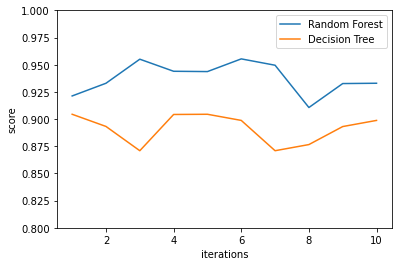

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
rfc_1=[]
clf_1=[]
for i in range(10):
    rfc=RandomForestClassifier(n_estimators=20)
    rfc_s=cross_val_score(rfc,X,y,cv=3).mean()
    rfc_1.append(rfc_s)
    clf=DecisionTreeClassifier(max_depth=3)
    clf_s=cross_val_score(clf,X,y,cv=3).mean()
    clf_1.append(clf_s)
    
plt.figure()
plt.plot(range(1,11),rfc_1,label="Random Forest")
plt.plot(range(1,11),clf_1,label="Decision Tree")
plt.ylim((0.8,1))
plt.xlabel('iterations')
plt.ylabel('score')
plt.legend()
plt.show()

# 波士顿房价预测

In [6]:
from sklearn.datasets import load_boston
boston=load_boston()
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [7]:
print('boston数据集形态:',boston['data'].shape)

boston数据集形态: (506, 13)


In [9]:
print('boston数据集特征名称:\n',boston['feature_names'])

boston数据集特征名称:
 ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [10]:
print('目标变量MEDV：',boston.target[:10])

目标变量MEDV： [24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9]


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X,y=boston.data,boston.target
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=8)
reg=LinearRegression()
reg.fit(X_train,y_train)
print('线性回归训练集得分:{:.3f}'.format(reg.score(X_train,y_train)))
print('线性回归测试集得分:{:.3f}'.format(reg.score(X_test,y_test)))

线性回归训练集得分:0.744
线性回归测试集得分:0.719


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
X,y=boston.data,boston.target
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=8)
rf_reg=RandomForestRegressor(n_estimators=20,random_state=32)
rf_reg.fit(X_train,y_train)
print('随机森林训练集得分:{:.3f}'.format(rf_reg.score(X_train,y_train)))
print('随机森林测试集得分:{:.3f}'.format(rf_reg.score(X_test,y_test)))

随机森林训练集得分:0.982
随机森林测试集得分:0.830


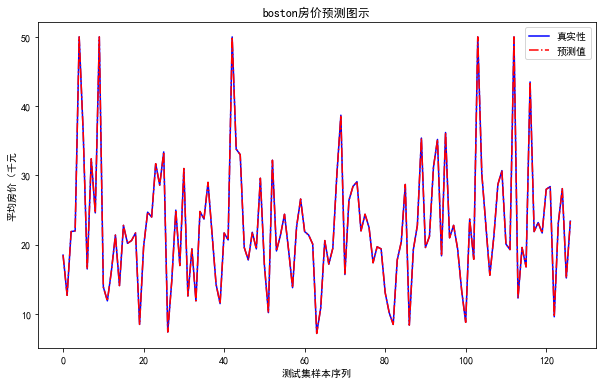

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
y_pred=rf_reg.predict(X_test)
plt.rcParams['font.sans-serif']='SimHei'
plt.rcParams['axes.unicode_minus']=False
plt.figure(figsize=(10,6))
plt.plot(range(y_test.shape[0]),y_test,c='blue',linestyle='-',label='真实性')
plt.plot(range(y_test.shape[0]),y_test,c='red',linestyle='-.',label='预测值')
plt.title('boston房价预测图示')
plt.xlabel('测试集样本序列')
plt.ylabel('平均房价（千元')
plt.legend()
plt.show()